# Cluster analysis of created DataFrames

## K-prototypes algorithm for mixed data

If we keep "Mean Profit" column, then we will have 1 cluster.
If we delete both "Mean Profit" and "Mean Revenue", thus 2 clusters will be created: [0:326] and [1:218].

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import configlib as lib

lib.list_saved()

All the DataFrames saved under ../data/pickles/:
cleaning-v2.pkl


In [7]:
df = lib.call_df('cleaning-v2')
df = df.drop({'Company', 'Action','Mean Revenue', 'Mean Profit'} , axis = 1)

In [8]:
df.head(1)

,Industry,Country,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании
0,Health Care,United States,paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия


In [9]:
mark_array=df.values

Mark columns that has float datatypes

In [10]:
mark_array[:, 3] = mark_array[:, 3].astype(float)
mark_array

array([['Health Care', 'United States', 'paused', ...,
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц',
        'Крупные предприятия'],
       ['Materials', 'France', 'leaved', ...,
        'Непубличные акционерные общества',
        'Совместная частная и иностранная собственность',
        'Крупные предприятия'],
       ['Information Technology', 'Japan', 'leaved', ...,
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц',
        'Крупные предприятия'],
       ...,
       ['Health Care', 'United States', 'paused', ...,
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц',
        'Крупные предприятия'],
       ['Utilities', 'France', 'leaved', ...,
        'Непубличные акционерные общества',
        'Совместная частная и иностранная собственность',
        'Микропредприятия'],
       ['Financials', 'United States', 'leaved', ...

Get the position of categorical columns

In [11]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Industry', 'Country', 'Tone', 'Вид деятельности/отрасль', 'Организационно-правовая форма', 'Форма собственности', 'Размер компании']
Categorical columns position  : [0, 1, 2, 4, 5, 6, 7]


In [12]:
dfMatrix = df.to_numpy()
dfMatrix

array([['Health Care', 'United States', 'paused', ...,
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц',
        'Крупные предприятия'],
       ['Materials', 'France', 'leaved', ...,
        'Непубличные акционерные общества',
        'Совместная частная и иностранная собственность',
        'Крупные предприятия'],
       ['Information Technology', 'Japan', 'leaved', ...,
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц',
        'Крупные предприятия'],
       ...,
       ['Health Care', 'United States', 'paused', ...,
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц',
        'Крупные предприятия'],
       ['Utilities', 'France', 'leaved', ...,
        'Непубличные акционерные общества',
        'Совместная частная и иностранная собственность',
        'Микропредприятия'],
       ['Financials', 'United States', 'leaved', ...

In [13]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Industry                         0
Country                          0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  0
dtype: int64


### Elbow method to detect number of clusters [K]

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


<function matplotlib.pyplot.show(close=None, block=None)>

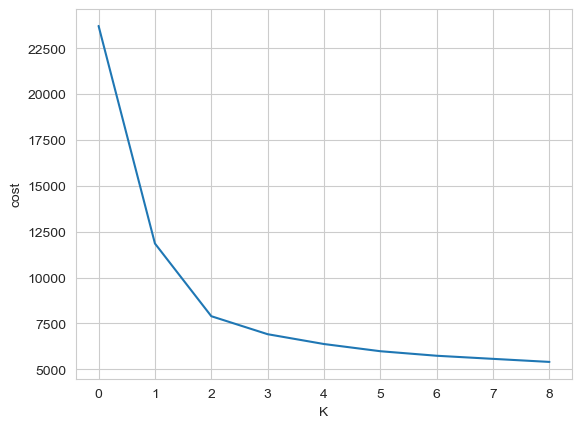

In [14]:
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [15]:
cost

[23710.52909664521,
 11853.041530762159,
 7891.151827516149,
 6910.352513150235,
 6375.059639047463,
 5983.017895069677,
 5736.168738747749,
 5566.964174301405,
 5400.213702254852]

In [16]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=30)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 2, 4, 5, 6, 7])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 20, ncost: 12068.19759963948
Run: 1, iteration: 2/30, moves: 13, ncost: 12022.57259068127
Run: 1, iteration: 3/30, moves: 11, ncost: 11953.119249243453
Run: 1, iteration: 4/30, moves: 10, ncost: 11919.822181110778
Run: 1, iteration: 5/30, moves: 0, ncost: 11919.822181110778
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/30, moves: 122, ncost: 11890.507109257924
Run: 2, iteration: 2/30, moves: 8, ncost: 11858.982041988524
Run: 2, iteration: 3/30, moves: 4, ncost: 11853.041530762159
Run: 2, iteration: 4/30, moves: 0, ncost: 11853.041530762159
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/30, moves: 39, ncost: 12156.469961519313
Run: 3, iteration: 2/30, moves: 17, ncost: 12064.273058104429
Run: 3,

In [17]:
print(kproto.cluster_centroids_)

[['12.495708154506438' 'Industrials' 'United States' 'leaved'
  'Разработка компьютерного программного обеспечения'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц' 'Крупные предприятия']
 ['24.013793103448275' 'Industrials' 'United States' 'leaved'
  'Разработка компьютерного программного обеспечения'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц' 'Крупные предприятия']]


In [18]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [19]:
cluster_dict

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,


In [20]:
df['cluster']=cluster_dict

In [21]:
for i in range(0,5):
    print(i, ": ", df[df['cluster']== i].value_counts().sum())

0 :  233
1 :  145
2 :  0
3 :  0
4 :  0


In [22]:
df

,Industry,Country,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,cluster
0,Health Care,United States,paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,0
1,Materials,France,leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,0
3,Information Technology,Japan,leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1
6,Industrials,France,paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,0
7,Health Care,United States,leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,0
...,...,...,...,...,...,...,...,...,...
470,Consumer Staples,Germany,continue,25.0,Производство прочей молочной продукции,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1
471,Consumer Staples,Germany,leaved,15.5,Деятельность по управлению холдинг-компаниями,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,Средние предприятия,0
472,Health Care,United States,paused,24.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1
473,Utilities,France,leaved,24.5,Производство прочего электрического оборудования,Непубличные акционерные общества,Совместная частная и иностранная собственность,Микропредприятия,1


In [23]:
df[df['cluster']== 0].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,cluster
0,Health Care,United States,paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,0
1,Materials,France,leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,0
6,Industrials,France,paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,0
7,Health Care,United States,leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,0
8,Health Care,Switzerland,leaved,16.0,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,0
10,Industrials,Germany,leaved,11.5,Сбор отходов,Общества с ограниченной ответственностью,Иная смешанная российская собственность,Средние предприятия,0
12,Industrials,Belgium,leaved,14.0,"Деятельность вспомогательная прочая, связанная...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,0
14,Materials,Germany,paused,15.0,Производство стекла и изделий из стекла,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,0
17,Consumer Discretionary,Netherlands,paused,7.5,Торговля оптовая электрической бытовой техникой,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,0
19,Industrials,Netherlands,paused,17.0,Деятельность административно-хозяйственная ком...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,0


In [24]:
df[df['cluster']== 1].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,cluster
3,Information Technology,Japan,leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1
9,Energy,Austria,leaved,26.5,Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,1
11,Health Care,France,continue,28.0,Торговля оптовая фармацевтической продукцией,Непубличные акционерные общества,Собственность иностранных юридических лиц,Крупные предприятия,1
13,Energy,United States,leaved,18.5,Предоставление услуг в области добычи нефти и ...,Общества с ограниченной ответственностью,Частная собственность,Крупные предприятия,1
18,Materials,Belgium,leaved,20.0,Торговля оптовая промышленными химикатами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1
22,Information Technology,United States,paused,23.5,Торговля оптовая изделиями из керамики и стекла,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1
23,Industrials,United States,leaved,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,Крупные предприятия,1
24,Materials,Norway,leaved,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,Крупные предприятия,1
25,Consumer Staples,United States,leaved,18.5,Производство хлеба и мучных кондитерских издел...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1
31,Consumer Discretionary,Germany,paused,24.5,Торговля розничная одеждой в специализированны...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1


In [25]:
df[df['cluster']== 2].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,cluster


### Visualization of clusters

In [26]:
df.columns = ["Action", "Tone", "Возраст компании, лет", "Вид деятельности/отрасль", "Организационно-правовая форма", "Форма собственности", "cluster"]
sns.pairplot(df, hue="cluster")

ValueError: Length mismatch: Expected axis has 9 elements, new values have 7 elements

In [ ]:
sns.boxplot(x="cluster", y="Возраст компании, лет", data=df)

In [ ]:
sns.boxplot(x="cluster", y="Организационно-правовая форма", data=df)

In [ ]:
sns.boxplot(x="cluster", y="Форма собственности", data=df)

## Clusterization of dataset with income and profit